In [69]:
# Common python libraries
import json
import string
import time


# Data handling libraries
import numpy as np
import pandas as pd

# scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Tensorflow libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Concatenate, Dense, Flatten, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K

# Plot Libraries
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import nltk

In [3]:
import nltk
import ssl
from nltk.corpus import stopwords  # Importa la librería stopwords de NLTK
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/eerubio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Cargar el archivo JSONL
with open('meta_Digital_Music.jsonl', 'r') as f:
    data = [json.loads(line) for line in f]

In [5]:
data_df_meta = pd.DataFrame(data)
data_df_meta.head(10)

main_category                                              title  \
0  Digital Music                                  Baja Marimba Band   
1  Digital Music   '80s Halloween-All Original Artists & Recordings   
2  Digital Music                                            TRIO +1   
3  Digital Music  Gold and Silver: Lehar, Delibes, Lanner, Johan...   
4  Digital Music  Grateful Dead Dave's Picks Volume 25 Live at B...   
5  Digital Music               Guitar Escape - Music For Relaxation   
6  Digital Music                                    CLASICOS DE ORO   
7  Digital Music               Indigo for Quantum Focus (Metamusic)   
8  Digital Music                                            Fastway   
9  Digital Music                       The Minimalism of Erik Satie   

   average_rating  rating_number features  \
0             4.9              8       []   
1             5.0              3       []   
2             5.0              1       []   
3             5.0              1       []   
4             4.9             20       []   
5             4.1             18       []   
6             5.0              1       []   
7             5.0              1       []   
8             4.7            754       []   
9             4.8              8       []   

                                         description   price  \
0                                                 []     NaN   
1                                                 []   14.98   
2                                         [CD ALBUM]   57.99   
3                                                 []   29.91   
4               [Sold out. Numbered limited edition]  149.99   
5  [2-disc CD set. Disc 1 "Escape" by Steve Middl...     NaN   
6                                                 []   20.98   
7  [Metamusic is more than music.It incorporates ...   28.99   
8                                                 []     NaN   
9  [The Minimalim of Erik Satie by The Vienna Art...    9.86   

                                              images videos  \
0  [{'thumb': 'https://m.media-amazon.com/images/...     []   
1  [{'thumb': 'https://m.media-amazon.com/images/...     []   
2  [{'thumb': 'https://m.media-amazon.com/images/...     []   
3  [{'thumb': 'https://m.media-amazon.com/images/...     []   
4  [{'thumb': 'https://m.media-amazon.com/images/...     []   
5  [{'thumb': 'https://m.media-amazon.com/images/...     []   
6  [{'thumb': 'https://m.media-amazon.com/images/...     []   
7  [{'thumb': 'https://m.media-amazon.com/images/...     []   
8  [{'thumb': 'https://m.media-amazon.com/images/...     []   
9  [{'thumb': 'https://m.media-amazon.com/images/...     []   

                                               store categories  \
0                                               None         []   
1  Love and Rockets  (Artist),     Duran Duran  (...         []   
2                   Rob Wasserman   Format: Audio CD         []   
3  Franz Lehar  (Composer),     Leo Delibes  (Com...         []   
4  Grateful Dead  (Artist, Orchestra)    Format: ...         []   
5  Guitar Escape  (Artist),     Steve Middleton  ...         []   
6  Los Cardenales del Exito  (Artist)    Format: ...         []   
7                       Hemi Sync   Format: Audio CD         []   
8                                            Fastway         []   
9            Vienna Art Orchestra   Format: Audio CD         []   

                                             details parent_asin  \
0      {'Date First Available': 'February 28, 2010'}  B000V87RP2   
1  {'Package Dimensions': '5.55 x 4.97 x 0.54 inc...  B0062F0MJQ   
2  {'Is Discontinued By Manufacturer': 'No', 'Pac...  B00005GT12   
3  {'Manufacturer': 'Hungaroton / White Label', '...  B0007PD2BW   
4  {'Package Dimensions': '5.55 x 4.97 x 0.54 inc...  B079CPD45R   
5  {'Package Dimensions': '5.55 x 4.97 x 0.54 inc...  B00NFJBVIS   
6      {'Date First Available': 'February 27, 2010'}  B001PH5SX6   
7  {'Package Dimensions': '5.6 x 4.8 x 0.1 i

In [6]:
# Cargar el archivo JSONL
with open('Digital_Music.jsonl', 'r') as f:
    data = [json.loads(line) for line in f]

In [7]:
data_df = pd.DataFrame(data)
data_df.head(10)

rating                                              title  \
0     5.0                                               Nice   
1     5.0                                          Excellent   
2     5.0                                      Great service   
3     1.0                                            No good   
4     3.0                   Cool concept, so-so execution...   
5     4.0  "L'attaque des clones" a satisfying taste of t...   
6     5.0          Ronnie Dunn like I've never heard before!   
7     5.0                A true classic seventies rock album   
8     5.0                        A great collection of music   
9     5.0                       Excellent musical experience   

                                                text images        asin  \
0  If i had a dollar for how many times I have pl...     []  B004RQ2IRG   
1  awesome sound - cant wait to see them in perso...     []  B0026UZEI0   
2  This is a great cd. Good music and plays well....     []  B0055JSYHC   
3  These are not real German singers, they have a...     []  B000F9SMUQ   
4  I first heard this playing in a Nagoya shop an...     []  B0049D1WVK   
5  I just saw "Star Wars: L'attaque des clones" l...     []  B00003CXKT   
6  This is without a doubt my favorite CD, and I ...     []  B083QN4Y6H   
7                                       Sounds great     []  B08L7CJ6NM   
8  This disk is fantastic I wanted the record but...     []  B092C24W4G   
9  This is a fantastic collection of music superb...     []  B01M32UHXG   

  parent_asin                       user_id      timestamp  helpful_vote  \
0  B004RQ2IRG  AFUOYIZBU3MTBOLYKOJE5Z35MBDA  1618972613292             0   
1  B0026UZEI0  AHGAOIZVODNHYMNCBV4DECZH42UQ  1308167525000             0   
2  B0055JSYHC  AFGEM6BXCYHUILEOA3P2ZYBEF2TA  1615838793006             0   
3  B000F9SMUQ  AH3OG6QD6EDJGZRVCFKV4B66VWNQ  1405219741000             0   
4  B0049D1WVK  AFW2PDT3AMT4X3PYQG7FJZH5FXFA  1309029595000             0   
5  B00003CXKT  AFW2PDT3AMT4X3PYQG7FJZH5FXFA  1022191122000             1   
6  B083QN4Y6H  AGYEAZK4OEYF2MSSTGJ5WNJDVZKA  1592615999887             0   
7  B08L7CJ6NM  AHB5CGLYN3Y6NIPHNQLYFJT2W2PQ  1641330592178             0   
8  B092C24W4G  AHB5CGLYN3Y6NIPHNQLYFJT2W2PQ  1641224888411             2   
9  B01M32UHXG  AHB5CGLYN3Y6NIPHNQLYFJT2W2PQ  1566575806068             0   

   verified_purchase  
0               True  
1               True  
2               True  
3               True  
4              False  
5              False  
6               True  
7               True  
8               True  
9              False

In [8]:
filtered_df = data_df[data_df['verified_purchase'] == True]
selected_data = filtered_df[['user_id', 'rating', 'text', 'parent_asin']]

In [9]:
selected_data.head(20)

user_id  rating  \
0   AFUOYIZBU3MTBOLYKOJE5Z35MBDA     5.0   
1   AHGAOIZVODNHYMNCBV4DECZH42UQ     5.0   
2   AFGEM6BXCYHUILEOA3P2ZYBEF2TA     5.0   
3   AH3OG6QD6EDJGZRVCFKV4B66VWNQ     1.0   
6   AGYEAZK4OEYF2MSSTGJ5WNJDVZKA     5.0   
7   AHB5CGLYN3Y6NIPHNQLYFJT2W2PQ     5.0   
8   AHB5CGLYN3Y6NIPHNQLYFJT2W2PQ     5.0   
11  AHB5CGLYN3Y6NIPHNQLYFJT2W2PQ     5.0   
12  AFUB7CHTXRPD447QVQCHBZVN2IPQ     5.0   
13  AFGWR7GZLOWSTFN2QJBE5NMGVEGQ     5.0   
14  AFGWR7GZLOWSTFN2QJBE5NMGVEGQ     5.0   
15  AFGWR7GZLOWSTFN2QJBE5NMGVEGQ     5.0   
16  AE7BV6IMNPZ3F266H7PXMH3BZQNQ     4.0   
19  AE7BV6IMNPZ3F266H7PXMH3BZQNQ     4.0   
22  AE7BV6IMNPZ3F266H7PXMH3BZQNQ     3.0   
23  AE7BV6IMNPZ3F266H7PXMH3BZQNQ     3.0   
24  AE7BV6IMNPZ3F266H7PXMH3BZQNQ     5.0   
26  AGJOKZFVJ665TS2NJFP46AJQJL3Q     5.0   
29  AFJOCZGYW6QFTYEYBZXCFZNWONKQ     5.0   
30  AEOHRV5ZJJZOCSACAJDNNHQJAG7Q     5.0   

                                                 text parent_asin  
0   If i had a dollar for how many times I have pl...  B004RQ2IRG  
1   awesome sound - cant wait to see them in perso...  B0026UZEI0  
2   This is a great cd. Good music and plays well....  B0055JSYHC  
3   These are not real German singers, they have a...  B000F9SMUQ  
6   This is without a doubt my favorite CD, and I ...  B083QN4Y6H  
7                                        Sounds great  B08L7CJ6NM  
8   This disk is fantastic I wanted the record but...  B092C24W4G  
11  It exceeds my expectations I wish all retailer...  B003NXEPY8  
12  astoundingly beautiful, haunting, moving Chora...  B0012N3PMY  
13               Fabulous Cd well worth purchasing...  B006X08FR6  
14  Very Good CD All the original songs not redone...  B000K4Y80O  
15  Great cd and what's nice its all of the origin...  B0009P1NXO  
16  With movies taking over Elvis' post-army caree...  B01KAVRPSS  
19  What would the Band be like without Robbie Rob...  B003B3V14W  
22  Another Chicago retrospective, this time an im...  B082K5Z5G7  
23  As a rule I tend to really enjoy covers discs....  B08TZMHLHX  
24  This three-disc import mini-box makes the near...  B07CXBXR2J  
26                        Arrived quickly, good price  B09WY1YYZJ  
29  This is for my husband's 50th high school reun...  B0041TW6BW  
30      My niece loved it for her 21st birthday!!!!!!  B00I5VQ7H6

In [10]:
def clean_reviews(reviews):
  """Limpia las reseñas de texto eliminando caracteres especiales, convirtiéndolas a minúsculas y eliminando palabras vacías.

  Args:
      reviews: Una lista de reseñas de texto.

  Returns:
      Una lista de reseñas limpiadas.
  """

  clean_reviews = []
  stop_words = stopwords.words('english')  # Descarga e inicializa las stop words en inglés

  for review in reviews:
    # Convertir a minúsculas
    review_lower = review.lower()

    # Eliminar caracteres de puntuación
    review_sin_puntuacion = ''.join(c for c in review_lower if c not in string.punctuation)

    # Tokenizar el texto (convertir en una lista de palabras)
    review_tokens = review_sin_puntuacion.split()

    # Eliminar stop words
    review_clean = [palabra for palabra in review_tokens if palabra not in stop_words]

    # Unir las palabras limpias en una cadena de texto
    review_clean_str = ' '.join(review_clean)

    clean_reviews.append(review_clean_str)

  return clean_reviews

In [11]:
# Limpiar columna numérica (eliminar NaN)
def clean_numeric_data(data):
    return data.dropna()

In [12]:
# Aplicar la función de limpieza en base al tipo de dato
clean_df = selected_data.copy()

In [13]:
clean_df = clean_numeric_data(clean_df)

In [14]:
clean_df['text'] = clean_reviews(clean_df['text'].tolist())

In [15]:
clean_df.head(20)

user_id  rating  \
0   AFUOYIZBU3MTBOLYKOJE5Z35MBDA     5.0   
1   AHGAOIZVODNHYMNCBV4DECZH42UQ     5.0   
2   AFGEM6BXCYHUILEOA3P2ZYBEF2TA     5.0   
3   AH3OG6QD6EDJGZRVCFKV4B66VWNQ     1.0   
6   AGYEAZK4OEYF2MSSTGJ5WNJDVZKA     5.0   
7   AHB5CGLYN3Y6NIPHNQLYFJT2W2PQ     5.0   
8   AHB5CGLYN3Y6NIPHNQLYFJT2W2PQ     5.0   
11  AHB5CGLYN3Y6NIPHNQLYFJT2W2PQ     5.0   
12  AFUB7CHTXRPD447QVQCHBZVN2IPQ     5.0   
13  AFGWR7GZLOWSTFN2QJBE5NMGVEGQ     5.0   
14  AFGWR7GZLOWSTFN2QJBE5NMGVEGQ     5.0   
15  AFGWR7GZLOWSTFN2QJBE5NMGVEGQ     5.0   
16  AE7BV6IMNPZ3F266H7PXMH3BZQNQ     4.0   
19  AE7BV6IMNPZ3F266H7PXMH3BZQNQ     4.0   
22  AE7BV6IMNPZ3F266H7PXMH3BZQNQ     3.0   
23  AE7BV6IMNPZ3F266H7PXMH3BZQNQ     3.0   
24  AE7BV6IMNPZ3F266H7PXMH3BZQNQ     5.0   
26  AGJOKZFVJ665TS2NJFP46AJQJL3Q     5.0   
29  AFJOCZGYW6QFTYEYBZXCFZNWONKQ     5.0   
30  AEOHRV5ZJJZOCSACAJDNNHQJAG7Q     5.0   

                                                 text parent_asin  
0   dollar many times played cd many times asked a...  B004RQ2IRG  
1   awesome sound cant wait see person always miss...  B0026UZEI0  
2   great cd good music plays well seller responde...  B0055JSYHC  
3   real german singers accents nothing advertised...  B000F9SMUQ  
6   without doubt favorite cd may close wearing en...  B083QN4Y6H  
7                                        sounds great  B08L7CJ6NM  
8   disk fantastic wanted record recieved couple b...  B092C24W4G  
11    exceeds expectations wish retailers great mayan  B003NXEPY8  
12     astoundingly beautiful haunting moving chorale  B0012N3PMY  
13                  fabulous cd well worth purchasing  B006X08FR6  
14  good cd original songs redone love cd well rec...  B000K4Y80O  
15  great cd whats nice original artists f lived e...  B0009P1NXO  
16  movies taking elvis postarmy career soundtrack...  B01KAVRPSS  
19  would band like without robbie robertson peopl...  B003B3V14W  
22  another chicago retrospective time import trou...  B082K5Z5G7  
23  rule tend really enjoy covers discs go round n...  B08TZMHLHX  
24  threedisc import minibox makes nearperfect com...  B07CXBXR2J  
26                         arrived quickly good price  B09WY1YYZJ  
29    husbands 50th high school reunion well see like  B0041TW6BW  
30                          niece loved 21st birthday  B00I5VQ7H6

In [16]:
processing_data = clean_df.copy()

In [17]:
user_encoder = LabelEncoder()
song_encoder = LabelEncoder()

processing_data['user_id'] = user_encoder.fit_transform(processing_data['user_id'])
processing_data['parent_asin'] = song_encoder.fit_transform(processing_data['parent_asin'])

# Dividir los datos en conjunto de entrenamiento y prueba
train_data, test_data = train_test_split(processing_data, test_size=0.25)

In [18]:
svd_training_time = 0

In [19]:
start_time = time.time()
n_users = processing_data['user_id'].nunique()
n_songs = processing_data['parent_asin'].nunique()

train_matrix = np.zeros((n_users, n_songs))
for row in train_data.itertuples():
    train_matrix[row.user_id, row.parent_asin] = row.rating

test_matrix = np.zeros((n_users, n_songs))
for row in test_data.itertuples():
    test_matrix[row.user_id, row.parent_asin] = row.rating
svd_training_time += (time.time() - start_time)

In [20]:
start_time = time.time()
svd = TruncatedSVD(n_components=50)
latent_matrix = svd.fit_transform(train_matrix)
svd_training_time += (time.time() - start_time)

In [48]:
start_time = time.time()
# Función para predecir calificaciones
def predict_ratings(user_id, song_id, latent_matrix, svd):
    user_latent = latent_matrix[user_id]
    song_latent = svd.components_[:, song_id]
    return np.dot(user_latent, song_latent)

# Inicialización de listas para predicciones y valores reales
test_predictions = []
test_truth = []

# Generación de predicciones y almacenamiento de valores reales
for row in test_data.itertuples():
    pred = predict_ratings(row.user_id, row.parent_asin, latent_matrix, svd)
    test_predictions.append(pred)
    test_truth.append(row.rating)
svd_training_time += (time.time() - start_time)

In [49]:
# Cálculo de métricas
rmse = np.sqrt(mean_squared_error(test_truth, test_predictions))
mae = mean_absolute_error(test_truth, test_predictions)
mse = mean_squared_error(test_truth, test_predictions)
r2 = r2_score(test_truth, test_predictions)

# Impresión de métricas
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')
print(f'Training Time: {svd_training_time} seconds')

RMSE: 4.5982027650286765
MAE: 4.42768952725573
MSE: 21.143468668317364
R²: -21.361106819674713
Training Time: 335.41727781295776 seconds


In [22]:
def recommend_songs(user_id, latent_matrix, svd, n=10):
    user_latent = latent_matrix[user_id]
    scores = np.dot(user_latent, svd.components_)
    recommendations = np.argsort(scores)[::-1]
    return recommendations[:n]

In [23]:
user_encoded = processing_data['user_id'].sample(1).values[0]

In [24]:
start_time = time.time()
recommendations = recommend_songs(user_encoded, latent_matrix, svd)
song_recommendations = song_encoder.inverse_transform(recommendations)
svd_training_time += (time.time() - start_time)

In [25]:
start_time = time.time()
recommended_top10_songs = []
for song in song_recommendations:
  recommended_top10_songs.extend(data_df_meta[data_df_meta['parent_asin'].isin([song])]['title'].values)

print(f"Top 10 canciones recomendadas para el usuario {user_encoder.inverse_transform([user_encoded])}:\n")
for i, song_name in enumerate(recommended_top10_songs, start=1):
  print(f'{i}: {song_name} \n')

svd_training_time += (time.time() - start_time)

Top 10 canciones recomendadas para el usuario ['AGAQQGSCGSYF7JLMHFE4IKBW7V6A']:

1: The Dark Side Of The Moon (Experience Edition) (2CD) 

2: The Road to Hana Guide for Maui: Experiencing the Road to Hana... and Beyond! 

3: Forever Changes 

4: Outrun The Sky 

5: Legendary Folk Songs 

6: Another Bundle of Tantrums: Plus Album 'Bundle of Tantrums' 

7: More Gunfighter Ballads & Trail Songs 

8: Greatest Hits 

9: Vintage Jazz 

10: Water From The Well 



In [26]:
svd_training_time

335.08178305625916

# **CNN Algoritmo de recomendación**

In [27]:
cnn_training_time = 0

In [28]:
# Parámetros
max_length = 500  # Longitud máxima de las secuencias de texto
vocab_size = 10000  # Tamaño del vocabulario
embedding_dim = 128  # Dimensión del vector de embedding

In [29]:
start_time = time.time()
# Tokenización del texto
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(processing_data['text'])
text_sequences = tokenizer.texts_to_sequences(processing_data['text'])
text_padded = pad_sequences(text_sequences, maxlen=max_length)
cnn_training_time += (time.time() - start_time)

In [30]:
# Dividir los datos en conjunto de entrenamiento y prueba
train_indices, test_indices = train_test_split(np.arange(len(processing_data)), test_size=0.25, random_state=42)
train_data = processing_data.iloc[train_indices]
test_data = processing_data.iloc[test_indices]
train_text_padded = text_padded[train_indices]
test_text_padded = text_padded[test_indices]

In [31]:
# Creación del modelo de red neuronal
user_input = Input(shape=(1,), dtype=tf.int32, name='user_input')
text_input = Input(shape=(max_length,), dtype=tf.int32, name='text_input')
song_input = Input(shape=(1,), dtype=tf.int32, name='song_input')

user_embedding = Embedding(input_dim=len(user_encoder.classes_), output_dim=embedding_dim, name='user_embedding')(user_input)
song_embedding = Embedding(input_dim=len(song_encoder.classes_), output_dim=embedding_dim, name='song_embedding')(song_input)
text_embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim, name='text_embedding')(text_input)

user_vecs = Flatten()(user_embedding)
song_vecs = Flatten()(song_embedding)
text_vecs = Flatten()(text_embedding)

concatenated_embeddings = Concatenate()([user_vecs, song_vecs, text_vecs])

dense1 = Dense(128, activation='relu')(concatenated_embeddings)
dense2 = Dense(64, activation='relu')(dense1)
output = Dense(1)(dense2)

model = tf.keras.Model(inputs=[user_input, text_input, song_input], outputs=output)

In [55]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

def mape(y_true, y_pred):
    return K.mean(K.abs((y_true - y_pred) / y_true)) * 100

In [56]:
# Compilación del modelo
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse', rmse, mape])

In [51]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ song_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_input          │ (None, 500)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_embedding      │ (None, 1, 128)    │ 10,163,712 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ song_embedding      │ (None, 1, 128)    │  6,512,384 │ song_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_embedding      │ (None, 500, 128)  │  1,280,000 │ text_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 128)       │          0 │ user_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 128)       │          0 │ song_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 64000)     │          0 │ text_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64256)     │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0],  │
│                     │                   │            │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │  8,224,896 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 26,189,313 (99.90 MB)

 Trainable params: 26,189,313 (99.90 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Configurar el callback ModelCheckpoint
checkpoint = ModelCheckpoint(
    'music_recommendation_best_model.keras',        # Nombre del archivo del modelo
    monitor='val_loss', # Métrica a monitorear
    save_best_only=True,    # Guardar solo el mejor modelo
    mode='min',             # Modo de la métrica
    verbose=1
)

In [57]:
start_time = time.time()
# Entrenar el modelo con el callback
history = model.fit(
    [train_data['user_id'], train_text_padded, train_data['parent_asin']], 
    train_data['rating'],
    batch_size=64,
    epochs=10,
    verbose=1,
    validation_split=0.2,
    callbacks=[checkpoint]  # Añadir el callback aquí
)
cnn_training_time += (time.time() - start_time)

Epoch 1/10
900/901 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.3815 - mae: 0.3599 - mape: 10.5196 - mse: 0.3815 - rmse: 0.4538
Epoch 1: val_loss improved from inf to 0.58238, saving model to music_recommendation_best_model.keras
901/901 ━━━━━━━━━━━━━━━━━━━━ 34s 37ms/step - loss: 0.3810 - mae: 0.3596 - mape: 10.5122 - mse: 0.3810 - rmse: 0.4535 - val_loss: 0.5824 - val_mae: 0.5138 - val_mape: 18.2992 - val_mse: 0.5824 - val_rmse: 0.7529
Epoch 2/10
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0665 - mae: 0.1585 - mape: 4.9099 - mse: 0.0665 - rmse: 0.2486
Epoch 2: val_loss improved from 0.58238 to 0.57258, saving model to music_recommendation_best_model.keras
901/901 ━━━━━━━━━━━━━━━━━━━━ 33s 36ms/step - loss: 0.0665 - mae: 0.1585 - mape: 4.9096 - mse: 0.0665 - rmse: 0.2485 - val_loss: 0.5726 - val_mae: 0.4672 - val_mape: 17.3256 - val_mse: 0.5726 - val_rmse: 0.7461
Epoch 3/10
900/901 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0440 - mae: 0.1203 - mape: 3.7162 - mse: 0.0440 - rmse:

In [ ]:
# model = load_model('music_recommendation_best_model.keras')

In [59]:
# Evaluar el modelo en el conjunto de prueba
test_metrics = model.evaluate([test_data['user_id'], test_text_padded, test_data['parent_asin']], test_data['rating'])

# Mostrar las métricas evaluadas
test_loss = test_metrics[0]
test_mae = test_metrics[1]
test_mse = test_metrics[2]
test_rmse = test_metrics[3]
test_mape = test_metrics[4]

print(f'Test Loss (MSE): {test_loss}')
print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')
print(f'Test RMSE: {test_rmse}')
print(f'Test MAPE: {test_mape}')

751/751 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5786 - mae: 0.4446 - mape: 16.9237 - mse: 0.5786 - rmse: 0.7421
Test Loss (MSE): 0.5792959332466125
Test MAE: 0.44388681650161743
Test MSE: 0.5792959332466125
Test RMSE: 0.7429967522621155
Test MAPE: 16.800067901611328


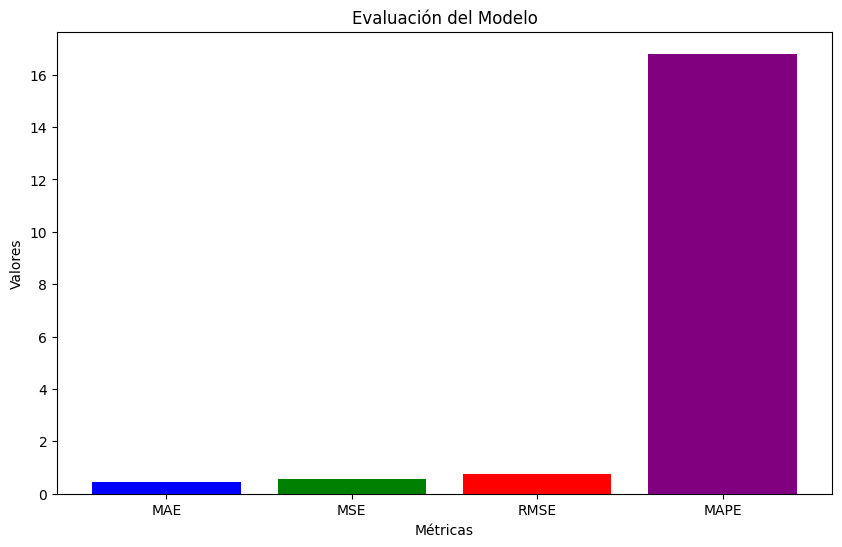

In [63]:
metrics = ['MAE', 'MSE', 'RMSE', 'MAPE']
values = [test_mae, test_mse, test_rmse, test_mape]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.title('Evaluación del Modelo')
plt.show()

751/751 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


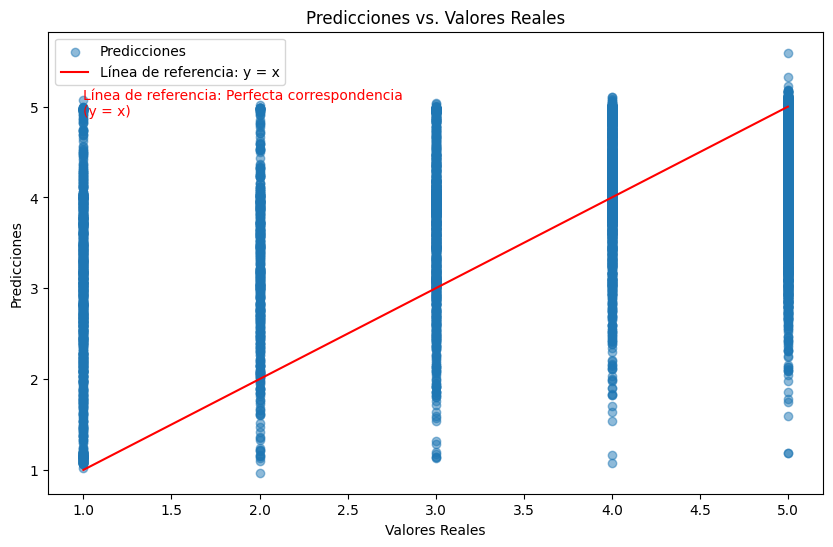

In [67]:
# Generar las predicciones (ejemplo)
predictions = model.predict([test_data['user_id'], test_text_padded, test_data['parent_asin']])
true_values = test_data['rating']

plt.figure(figsize=(10, 6))
plt.scatter(true_values, predictions, alpha=0.5, label='Predicciones')
plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], color='red', label='Línea de referencia: y = x')  # Línea de referencia

# Agregar etiquetas y título
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')

# Agregar leyenda
plt.legend()

# Agregar texto explicativo
plt.text(min(true_values), max(true_values) - 0.1, 'Línea de referencia: Perfecta correspondencia\n(y = x)', color='red')

# Mostrar la gráfica
plt.show()

In [38]:
# Función para predecir la calificación de una canción
def predict_rating(song):
    song_encoded = np.array([song])
    user_array = np.array([user_encoded])
    user_text_array = np.array([user_text_padded[0]])
    predicted_rating = model.predict([user_array, user_text_array, song_encoded])
    return (song, predicted_rating[0][0])

In [39]:
start_time = time.time()
# Preprocesamiento del texto para el usuario seleccionado
user_text = processing_data[processing_data['user_id'] == user_encoded]['text'].values[0]
user_text_sequence = tokenizer.texts_to_sequences([user_text])
user_text_padded = pad_sequences(user_text_sequence, maxlen=max_length)

# Predecir calificaciones para todas las canciones usando map
all_songs = processing_data['parent_asin'].unique()
predicted_ratings = list(map(predict_rating, all_songs))
cnn_training_time += (time.time() - start_time)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━

In [40]:
sorted_predicted_song_names = [rec[0] for rec in predicted_ratings]

In [41]:
# Decodificar los IDs de las canciones a nombres originales
song_names = song_encoder.inverse_transform(sorted_predicted_song_names)

In [42]:
start_time = time.time()
# Ordenar las predicciones por calificación descendente
predicted_ratings.sort(key=lambda x: x[1], reverse=True)

# Obtener las 10 mejores recomendaciones
top_10_recommendations = predicted_ratings[:10]

# Decodificar los IDs de las canciones a nombres originales
top_10_song_names = song_encoder.inverse_transform([rec[0] for rec in top_10_recommendations])
cnn_training_time += (time.time() - start_time)

In [43]:
recommended_top10_songs = []
for song in top_10_song_names:
  recommended_top10_songs.extend(data_df_meta[data_df_meta['parent_asin'].isin([song])]['title'].values)

print(f"Top 10 canciones recomendadas para el usuario {user_encoder.inverse_transform([user_encoded])}: {recommended_top10_songs}")
for i, song_name in enumerate(recommended_top10_songs, start=1):
  print(f'Canción recomendada {i}: {song_name} \n')

Top 10 canciones recomendadas para el usuario ['AGAQQGSCGSYF7JLMHFE4IKBW7V6A']: ['Remembering Shamshad Begum Set', 'Sinopoli Conducts Bruckner: Symphonies Nos. 3,4,5,7,8 & 9', 'Cuba: A Musical Journey', 'Theme Time Radio Hour: Baseball', 'Breezin by George Benson (1990) Audio CD', 'アトミック・システム', 'Audio Sixpence None The Richer: The Ultimate Collection', 'Finding My Way', 'The Rolling Stones - Hot Rocks: 1964-1971 (Vinyl/LP)', 'Those Magnificent Men in Their Flying Machines']
Canción recomendada 1: Remembering Shamshad Begum Set 

Canción recomendada 2: Sinopoli Conducts Bruckner: Symphonies Nos. 3,4,5,7,8 & 9 

Canción recomendada 3: Cuba: A Musical Journey 

Canción recomendada 4: Theme Time Radio Hour: Baseball 

Canción recomendada 5: Breezin by George Benson (1990) Audio CD 

Canción recomendada 6: アトミック・システム 

Canción recomendada 7: Audio Sixpence None The Richer: The Ultimate Collection 

Canción recomendada 8: Finding My Way 

Canción recomendada 9: The Rolling Stones - Hot Rocks

In [44]:
cnn_training_time

1964.9537510871887